## アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。


irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

- [Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。

scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

### 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を**2値分類** と呼び、それ以上の**多値分類** とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length

In [1]:
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
display(df)
print("種類の名前 : {}".format(iris_dataset.target_names))

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


種類の名前 : ['setosa' 'versicolor' 'virginica']


In [4]:
df1 = df.query("Species != 0").loc[:, ["sepal_length", "petal_length", "Species"]]
display(df1)

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### 【問題2】データの分析

まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

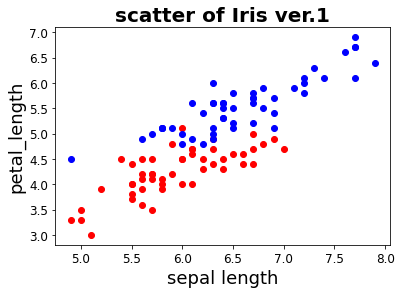

In [5]:
#x_0 = df[df.Species==0].iloc[:, 0:1]# sepal lengthでラベル０
x_1 = df.query("Species == 1").iloc[:, 0:1]# sepal lengthでラベル1
x_2 = df.query("Species == 2").iloc[:, 0:1]# sepal lengthでラベル2

#y_0 = df[df.Species==0].iloc[:, 2:3]# petal_lengthでラベル０
y_1 = df.query("Species == 1").iloc[:, 2:3]# petal_lengthでラベル1
y_2 = df.query("Species == 2").iloc[:, 2:3]# petal_lengthでラベル2

# 散布図を描画
plt.title("scatter of Iris ver.1", size=20, weight='heavy')
plt.xlabel("sepal length", size=18)
plt.ylabel("petal_length", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red')
plt.scatter(x_2, y_2, c='blue')

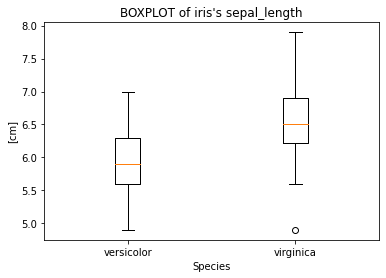

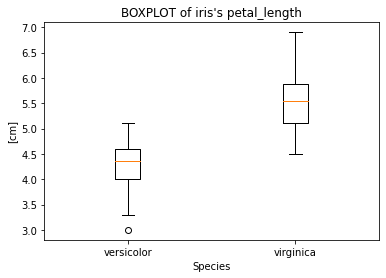

In [6]:
features = ["sepal_length", "petal_length"]

for i in features:
    plt.boxplot([df[df["Species"]==1][i], df[df["Species"]==2][i]])
    plt.xticks([1, 2], iris_dataset.target_names[1:])
    plt.title("BOXPLOT of iris's {}".format(i))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

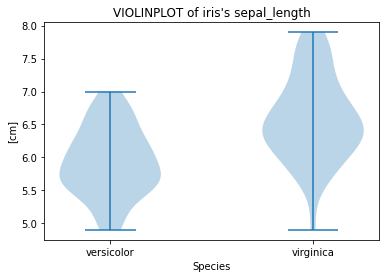

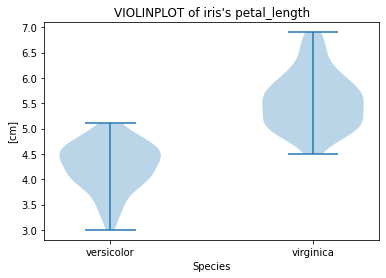

In [7]:
features = ["sepal_length", "petal_length"]

for i in features:
    plt.violinplot([df[df["Species"]==1][i], df[df["Species"]==2][i]])
    plt.xticks([1, 2],  iris_dataset.target_names[1:])
    plt.title("VIOLINPLOT of iris's {}".format(i))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

### 【問題3】前処理・訓練データと検証データの分割

前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnの`train_test_split`が利用できます。公式ドキュメントのExamplesを参考に動かしてください。

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**《注意点》**

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

**《分割する理由》**

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df1.iloc[:, :2].values# ndarrayに変換
y = df1.iloc[:, 2:].values# ndarrayに変換
y = y.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X", type(X))
print("y", type(y))
print("y.shape", y.shape)
print("X_train : ", X_train.shape, "X_test : ", X_test.shape)
print("y_train : ", y_train.shape, "y_test : ", y_test.shape)

X <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
y.shape (100,)
X_train :  (75, 2) X_test :  (25, 2)
y_train :  (75,) y_test :  (25,)


### 【問題4】前処理・標準化

分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。
(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**《注意点》**

標準化は訓練用のデータで`fit`を行い、訓練用、検証用双方のデータに`transform`を行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。


**《実際の問題での前処理は？》**

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

### 標準化について

データの平均値と分散を変換する操作を標準化と呼ぶ。

**平均値を0, 分散を1とすることが多いが、平均値が0にならないこともある。**

変換操作は以下の式で表される。

$$
\displaystyle Y = \frac{X-\mu}{\sigma}
$$

ここで、Yは変換後のデータ、Xは変換前のデータである。
また、μ,σは、それぞれXの平均、分散である。

### StandardScalerのメソッド

良く使うメソッドは次の3つ。

- `fit(X)`

配列Xの平均と分散を計算して、記憶する（変換は行わない）。


- `transform(X)`

fitによる計算を配列Xに行い変換。変換後の配列を返す。


- `fit_transform(X)`

配列Xに対して、fitとtransformを同時に行う。


なお、2次元配列を変換する場合、縦 (axis=0) 方向に変換が行われる。

In [10]:
#現時点での平均値と分散
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[6.28       4.95333333]
[0.67606706 0.83973541]


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
#Xの訓練データのみを標準化

scaler = StandardScaler()#インスタンスの生成

scaler.fit(X_train)#Xの訓練データのみfit

X_train_std = scaler.transform(X_train)#fitの結果をXの訓練データに適用し、tansform
X_test_std = scaler.transform(X_test)#fitの結果をXのテストデータに適用し、tansform

print("X_train_std", X_train_std.shape)
print("X_test_std", X_test_std.shape)
print("X_train_std.mean", X_train_std.mean(axis=0))# 平均
print("X_train_std.std", X_train_std.std(axis=0))# 分散

X_train_std (75, 2)
X_test_std (25, 2)
X_train_std.mean [-1.64609067e-15 -8.61533067e-16]
X_train_std.std [1. 1.]


### 【問題5】学習と推定

最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

学習が終わった後、検証データを`predict`メソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、`n_neighbors`の数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を`5-nn`、3の場合を`3-nn`のように呼びます。

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# インスタンス生成
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_1 = KNeighborsClassifier(n_neighbors=1)

# 訓練データで学習
knn_5.fit(X_train_std, y_train)
knn_3.fit(X_train_std, y_train)
knn_1.fit(X_train_std, y_train)

# テストデータで予測
y_pred_5nn = knn_5.predict(X_test_std)
y_pred_3nn = knn_3.predict(X_test_std)
y_pred_1nn = knn_1.predict(X_test_std)

print("5-nn", y_pred_5nn)
print("3-nn", y_pred_3nn)
print("1-nn", y_pred_1nn)

5-nn [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
3-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
1-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


### 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には

- Accuracy（正解率）
- Precision（適合率）
- Recall（再現率）
- F値 

があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

#### 各指標値について


Accuracy（正解率）は「全ての中で正解した割合」　$\frac{TP+TN}{TP+TN+FP+FN}$

Precision（適合率）は「Positiveだと判定された中で実際にPositiveな割合」　$\frac{TP}{TP+FP}$

Recall（再現率）は「実際にはPositiveなものの中でPositiveだと判定された割合」　$\frac{TP}{TP+FN}$

F1は「PrecisionとRecallの調和平均」　 $2\times\frac{Precision*Recall}{Precision+Recall}$

どの値も大きい方が精度が良いと言える。

Accuracyは最も単純な指標値ですが、例えばNegativeが99個、Positiveが1個の場合、100個全てNegativeと判定すると、**(0+99)/(0+99+0+1)=0.99** となります。これは一見高い値ですが、重大な病気を持つ患者1人を見つけたい場合には不適切です。

この時Recallを見ると、**0/(0+1)=0**となります。重大な病気を持つ患者が見つけられていないことがはっきりと分かります。

100個全てPositiveと判定すればRecallを大きくすることはできます。**1/(1+0)=1** となります。しかし、全員が病気を持つと判定するのであればその予測には意味がありません。健康（Negative）なのに、病気を持っている（Positive）と間違って判定されたFalse Netativeが99人もいます。

Precisionを見ると**1/(1+99)=0.01**となります。Positiveだと選ばれた中に間違いが多いことがはっきりと分かります。

全て網羅していなくとも、選ばれた中に間違いが少ない状態を目指したい場合はPrecisionを上げるようにします。例えばスパムメールの判定タスクです。疑わしきは罰せずということになります。

見逃すことがまずい不正アクセス検知のタスクでは、Precisionがある程度下がってもRecallを上げたいとなるでしょう。疑わしきは罰するということになります。

他の例では、採用活動で良い人材を漏れなく合格にするか、会社に合わない人材を合格させないようにするかといったことが考えられます。

このように、状況に応じてRecallとPrecisionをどの程度優先したいかということは変わってきます。判定のしきい値をどうするかという違いになってきます。

機械学習の手法によってはPositiveである確率で予測するものも多いです。この時判定のしきい値を0.5から上下させることで、RecallとPrecisionの値は変化していきます。

**RecallとPrecisionのバランスをとったものとしてF1があり、ひとまずこれを見てみるということは多いです。また、AUCという指標値もよく使われます。**


参考URL：

[【入門者向け】機械学習の分類問題評価指標解説(正解率・適合率・再現率など)](https://qiita.com/FukuharaYohei/items/be89a99c53586fa4e2e4)

[機械学習で使う指標総まとめ](https://www.procrasist.com/entry/ml-metrics)

In [15]:
from sklearn import metrics


def evaluation(y_pred, y_test):
    acc = metrics.accuracy_score(y_pred, y_test)
    precision = metrics.precision_score(y_pred, y_test)
    recall = metrics.recall_score(y_pred, y_test)
    f1 = metrics.f1_score(y_pred, y_test)
    confusion = metrics.confusion_matrix(y_pred, y_test)
    print("acc:", acc)
    print("precision:", precision)
    print("recall:", recall)
    print("f1:", f1)
    print("confusion:\n", confusion)
    print("------------")
    return acc, precision, recall, f1, confusion

print("5-nn;")
evl_5nn = evaluation(y_pred_5nn, y_test)

print("3-nn;")
evl_3nn = evaluation(y_pred_3nn, y_test)

print("1-nn;")
evl_1nn = evaluation(y_pred_1nn, y_test)


5-nn;
acc: 0.8
precision: 0.9285714285714286
recall: 0.7647058823529411
f1: 0.8387096774193549
confusion:
 [[13  4]
 [ 1  7]]
------------
3-nn;
acc: 0.8
precision: 0.8571428571428571
recall: 0.8
f1: 0.8275862068965518
confusion:
 [[12  3]
 [ 2  8]]
------------
1-nn;
acc: 0.8
precision: 0.8571428571428571
recall: 0.8
f1: 0.8275862068965518
confusion:
 [[12  3]
 [ 2  8]]
------------


- **混同行列をヒートマップで出してみる（試しに5-nnだけ）**

https://evaluelog.com/post-122/

In [16]:
import seaborn as sns

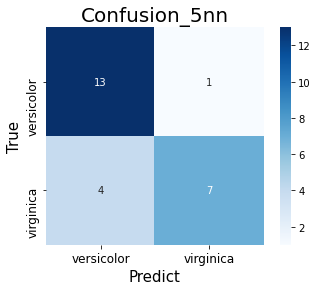

In [17]:
cm = metrics.confusion_matrix(y_test,  y_pred_5nn)
cm = pd.DataFrame(data=cm, index=["versicolor", "virginica"], 
                           columns=["versicolor", "virginica"])
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.title("Confusion_5nn", size=20)
plt.tick_params(labelsize=12)
plt.xlabel("Predict", fontsize=15, rotation=0)
plt.ylabel("True", fontsize=15)
plt.savefig('sklearn_confusion_matrix.png')

混同行列はある実際の値に対して、推定された値ごとの個数をまとめたものである。

上の例だと次のように読み解く。

- 左上が正解がversicolorの中でversicolorと正しく推定されたものが13個。
- 右上が正解がversicolorの中でvirginicaと間違って推定されたものが1個。
- 左下が正解がvirginicaの中でversicolorと間違って推定されたものが4個。
- 右下が正解がvirginicaの中でvirginicaと正しく推定されたものが7個。

ここでは2値分類であるため、「virginicaであるかどうかを判定する問題」と捉えると、virginicaを **Positive（陽性）** 、versicolorを **Negative（陰性）** と呼ぶことになる。

scikit-learnで出力した混同行列では、左上がTrue Negative(TN)、右上がFalse Positive(FP)、左下がFalse Negative(FN)、右下がTrue Positive(TP)と呼ぶ。

### 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

- **n_neighbors=5**

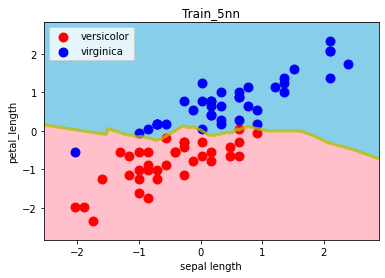

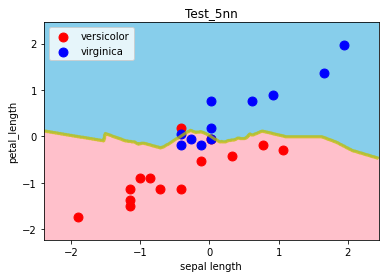

In [19]:
train_5nn = decision_region(X_train_std, y_train, knn_5, title='Train_5nn', xlabel='sepal length', ylabel='petal_length')
test_5nn = decision_region(X_test_std, y_test, knn_5, title='Test_5nn', xlabel='sepal length', ylabel='petal_length')

- **n_neighbors=3**

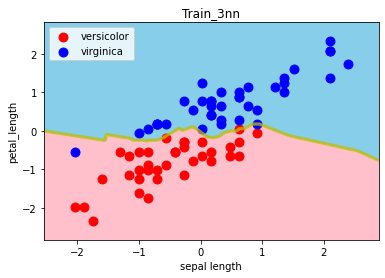

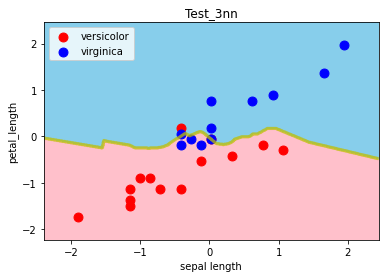

In [20]:
train_3nn = decision_region(X_train_std, y_train, knn_3, title='Train_3nn', xlabel='sepal length', ylabel='petal_length')
test_3nn = decision_region(X_test_std, y_test, knn_3, title='Test_3nn', xlabel='sepal length', ylabel='petal_length')

- **n_neighbors=1**

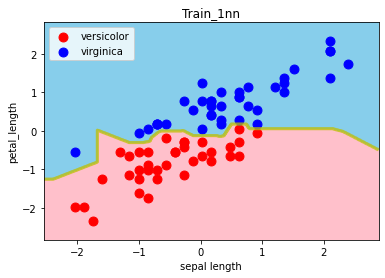

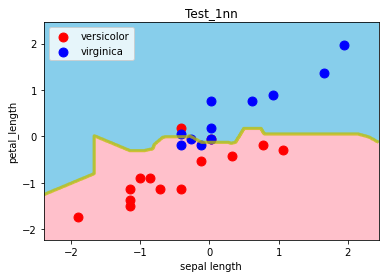

In [21]:
train_1nn = decision_region(X_train_std, y_train, knn_1, title='Train_1nn', xlabel='sepal length', ylabel='petal_length')
test_1nn = decision_region(X_test_std, y_test, knn_1, title='Test_1nn', xlabel='sepal length', ylabel='petal_length')

### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。
1. 最近傍法
2. ロジスティック回帰
3. SVM
4. 決定木
5. ランダムフォレスト

#### 1. 最近傍法

[pandas.DataFrameに列や行を追加（assign, appendなど）](https://note.nkmk.me/python-pandas-assign-append/)

In [22]:
# 表を作るのに使用
pred_df = pd.DataFrame({'k-nearest neighbors_5nn' : [metrics.accuracy_score(y_pred_5nn, y_test), 
                                                   metrics.precision_score(y_pred_5nn, y_test), 
                                                   metrics.recall_score(y_pred_5nn, y_test), 
                                                   metrics.f1_score(y_pred_5nn, y_test), 
                                                   metrics.confusion_matrix(y_pred_5nn, y_test)], 
                                             'k-nearest neighbors_3nn' : [metrics.accuracy_score(y_pred_3nn, y_test), 
                                                    metrics.precision_score(y_pred_3nn, y_test), 
                                                    metrics.recall_score(y_pred_3nn, y_test), 
                                                    metrics.f1_score(y_pred_3nn, y_test), 
                                                    metrics.confusion_matrix(y_pred_3nn, y_test)], 
                                             'k-nearest neighbors_1nn' : [metrics.accuracy_score(y_pred_1nn, y_test), 
                                                    metrics.precision_score(y_pred_1nn, y_test), 
                                                    metrics.recall_score(y_pred_1nn, y_test), 
                                                    metrics.f1_score(y_pred_1nn, y_test), 
                                                    metrics.confusion_matrix(y_pred_1nn, y_test)]}, 
                                               index=["accuracy", "precision", "recall", "f1", "confusion_matrix"])

#### 2. ロジスティック回帰

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)
y_pred_lr

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

In [24]:
print("Logistic;")
evl_lr= evaluation(y_pred_lr, y_test)

Logistic;
acc: 0.84
precision: 0.8571428571428571
recall: 0.8571428571428571
f1: 0.8571428571428571
confusion:
 [[12  2]
 [ 2  9]]
------------


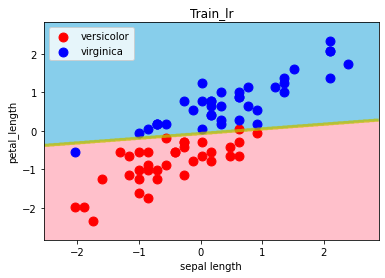

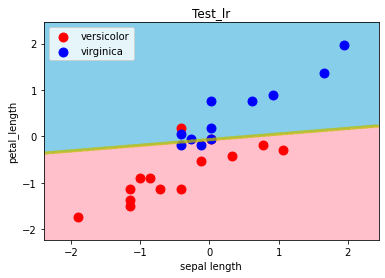

In [25]:
train_lr = decision_region(X_train_std, y_train, lr, title='Train_lr', xlabel='sepal length', ylabel='petal_length')
test_lr = decision_region(X_test_std, y_test, lr, title='Test_lr', xlabel='sepal length', ylabel='petal_length')

In [26]:
pred_df = pred_df.assign(Logistic = [metrics.accuracy_score(y_pred_lr, y_test), 
                                                   metrics.precision_score(y_pred_lr, y_test), 
                                                   metrics.recall_score(y_pred_lr, y_test), 
                                                   metrics.f1_score(y_pred_lr, y_test), 
                                                   metrics.confusion_matrix(y_pred_lr, y_test)])

#### 3. SVM

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_std, y_train)
y_pred_svc = svc.predict(X_test_std)
y_pred_svc

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

In [28]:
print("SVM;")
evl_svc= evaluation(y_pred_svc, y_test)

SVM;
acc: 0.84
precision: 0.8571428571428571
recall: 0.8571428571428571
f1: 0.8571428571428571
confusion:
 [[12  2]
 [ 2  9]]
------------


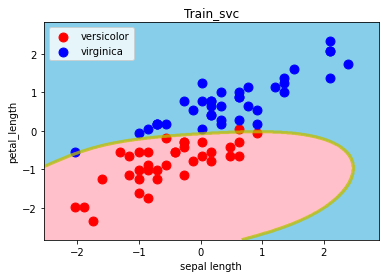

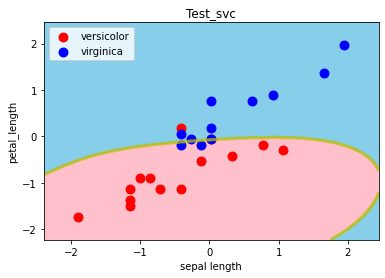

In [29]:
train_svc = decision_region(X_train_std, y_train, svc, title='Train_svc', xlabel='sepal length', ylabel='petal_length')
test_svc = decision_region(X_test_std, y_test, svc, title='Test_svc', xlabel='sepal length', ylabel='petal_length')

In [30]:
pred_df = pred_df.assign(SVM = [metrics.accuracy_score(y_pred_svc, y_test), 
                                                   metrics.precision_score(y_pred_svc, y_test), 
                                                   metrics.recall_score(y_pred_svc, y_test), 
                                                   metrics.f1_score(y_pred_svc, y_test), 
                                                   metrics.confusion_matrix(y_pred_svc, y_test)])

#### 4. 決定木

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)
y_pred_tree = tree.predict(X_test_std)
y_pred_tree

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

In [32]:
print("Decision Tree;")
evl_tree = evaluation(y_pred_tree, y_test)

Decision Tree;
acc: 0.84
precision: 0.9285714285714286
recall: 0.8125
f1: 0.8666666666666666
confusion:
 [[13  3]
 [ 1  8]]
------------


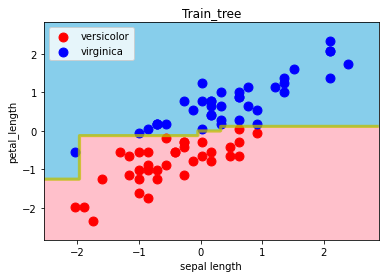

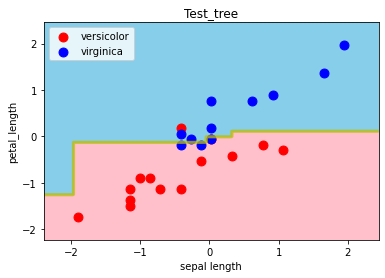

In [33]:
train_tree = decision_region(X_train_std, y_train, tree, title='Train_tree', xlabel='sepal length', ylabel='petal_length')
test_tree = decision_region(X_test_std, y_test, tree, title='Test_tree', xlabel='sepal length', ylabel='petal_length')

In [34]:
pred_df = pred_df.assign(Decision_Tree = [metrics.accuracy_score(y_pred_tree, y_test), 
                                                   metrics.precision_score(y_pred_tree, y_test), 
                                                   metrics.recall_score(y_pred_tree, y_test), 
                                                   metrics.f1_score(y_pred_tree, y_test), 
                                                   metrics.confusion_matrix(y_pred_tree, y_test)])

#### 5. ランダムフォレスト

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_std, y_train)
y_pred_rfc = rfc.predict(X_test_std)
y_pred_rfc

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

In [37]:
print("Random Forest;")
evl_rfc= evaluation(y_pred_rfc, y_test)

Random Forest;
acc: 0.84
precision: 0.9285714285714286
recall: 0.8125
f1: 0.8666666666666666
confusion:
 [[13  3]
 [ 1  8]]
------------


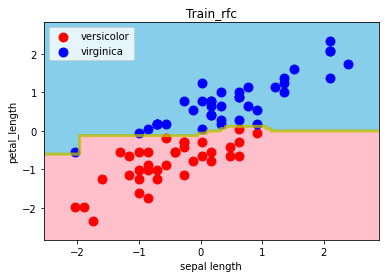

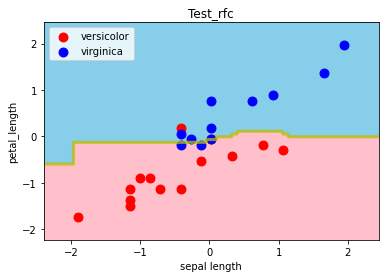

In [38]:
train_rfc = decision_region(X_train_std, y_train, rfc, title='Train_rfc', xlabel='sepal length', ylabel='petal_length')
test_rfc = decision_region(X_test_std, y_test, rfc, title='Test_rfc', xlabel='sepal length', ylabel='petal_length')

In [39]:
pred_df = pred_df.assign(Random_Forest = [metrics.accuracy_score(y_pred_rfc, y_test), 
                                                   metrics.precision_score(y_pred_rfc, y_test), 
                                                   metrics.recall_score(y_pred_rfc, y_test), 
                                                   metrics.f1_score(y_pred_rfc, y_test), 
                                                   metrics.confusion_matrix(y_pred_rfc, y_test)])

In [40]:
pred_df

,k-nearest neighbors_5nn,k-nearest neighbors_3nn,k-nearest neighbors_1nn,Logistic,SVM,Decision_Tree,Random_Forest
accuracy,0.8,0.8,0.8,0.84,0.84,0.84,0.84
precision,0.928571,0.857143,0.857143,0.857143,0.857143,0.928571,0.928571
recall,0.764706,0.8,0.8,0.857143,0.857143,0.8125,0.8125
f1,0.83871,0.827586,0.827586,0.857143,0.857143,0.866667,0.866667
confusion_matrix,"[[13, 4], [1, 7]]","[[12, 3], [2, 8]]","[[12, 3], [2, 8]]","[[12, 2], [2, 9]]","[[12, 2], [2, 9]]","[[13, 3], [1, 8]]","[[13, 3], [1, 8]]"


- 結果について

f1が最も大きいのは決定木とランダムフォレストで、最も小さかった物は最近傍法の3nnと1nnであった。このことからも決定木とランダムフォレストが、この2値分類では精度が良いと言えるかもしれない。


また、各決定領域にもそれぞれ特有の形が見られ、

最近傍法は波状、

ロジスティック回帰は直線状、

SVMは楕円状、

決定木とランダムフォレストは階段状


になっていた。

### 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

#### 1. 最近傍法

In [41]:
# インスタンス生成
knn_5n_n = KNeighborsClassifier(n_neighbors=5)
knn_3n_n = KNeighborsClassifier(n_neighbors=3)
knn_1n_n = KNeighborsClassifier(n_neighbors=1)

# 訓練データで学習
knn_5n_n.fit(X_train, y_train)
knn_3n_n.fit(X_train, y_train)
knn_1n_n.fit(X_train, y_train)

# テストデータで予測
y_pred_5nn_n = knn_5n_n.predict(X_test)
y_pred_3nn_n = knn_3n_n.predict(X_test)
y_pred_1nn_n = knn_1n_n.predict(X_test)

#各指標値の計算
evl_5nn_n = evaluation(y_pred_5nn_n, y_test)
evl_3nn_n = evaluation(y_pred_3nn_n, y_test)
evl_1nn_n = evaluation(y_pred_1nn_n, y_test)

acc: 0.8
precision: 0.9285714285714286
recall: 0.7647058823529411
f1: 0.8387096774193549
confusion:
 [[13  4]
 [ 1  7]]
------------
acc: 0.8
precision: 0.8571428571428571
recall: 0.8
f1: 0.8275862068965518
confusion:
 [[12  3]
 [ 2  8]]
------------
acc: 0.8
precision: 0.8571428571428571
recall: 0.8
f1: 0.8275862068965518
confusion:
 [[12  3]
 [ 2  8]]
------------


#### 5_nnの場合

Train_5nn_n：標準化なし

Train_5nn：標準化あり

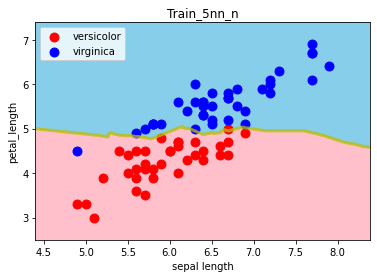

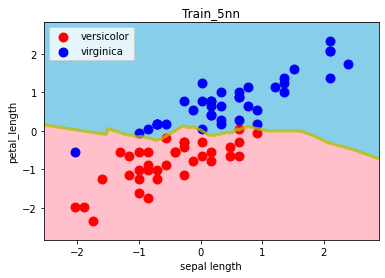

In [42]:
train_5nn_n = decision_region(X_train, y_train, knn_5n_n, title='Train_5nn_n', xlabel='sepal length', ylabel='petal_length')
train_5nn = decision_region(X_train_std, y_train, knn_5, title='Train_5nn', xlabel='sepal length', ylabel='petal_length')

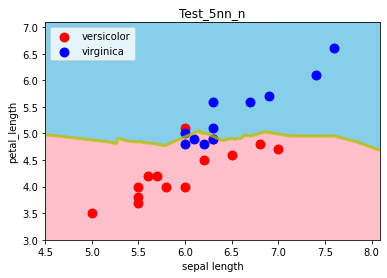

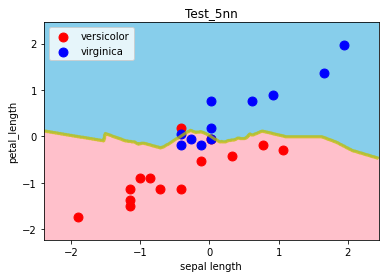

In [43]:
test_5nn_n = decision_region(X_test, y_test, knn_5n_n, title='Test_5nn_n', xlabel='sepal length', ylabel='petal_length')
test_5nn = decision_region(X_test_std, y_test, knn_5, title='Test_5nn', xlabel='sepal length', ylabel='petal_length')

#### 1_nnの場合

Train_1nn_n：標準化なし

Train_1nn：標準化あり

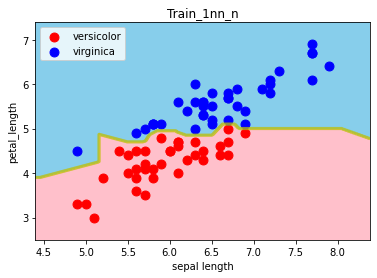

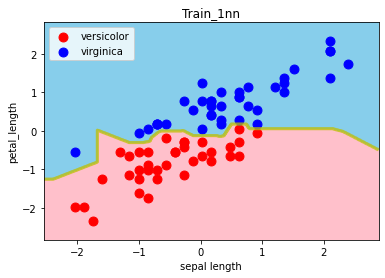

In [44]:
train_1nn_n = decision_region(X_train, y_train, knn_1n_n, title='Train_1nn_n', xlabel='sepal length', ylabel='petal_length')
train_1nn = decision_region(X_train_std, y_train, knn_1, title='Train_1nn', xlabel='sepal length', ylabel='petal_length')

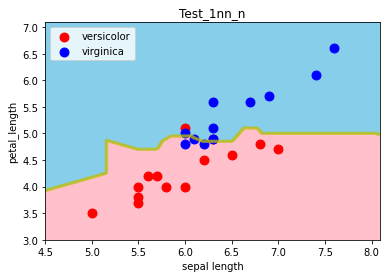

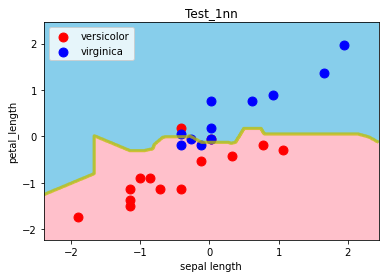

In [45]:
test_1nn_n = decision_region(X_test, y_test, knn_1n_n, title='Test_1nn_n', xlabel='sepal length', ylabel='petal_length')
test_1nn = decision_region(X_test_std, y_test, knn_1, title='Test_1nn', xlabel='sepal length', ylabel='petal_length')

In [46]:
# 表を作るのに使用
pred_df_n = pd.DataFrame({'k-nearest neighbors_5nn_n' : [metrics.accuracy_score(y_pred_5nn_n, y_test), 
                                                   metrics.precision_score(y_pred_5nn_n, y_test), 
                                                   metrics.recall_score(y_pred_5nn_n, y_test), 
                                                   metrics.f1_score(y_pred_5nn_n, y_test), 
                                                   metrics.confusion_matrix(y_pred_5nn_n, y_test)], 
                                             'k-nearest neighbors_3nn_n' : [metrics.accuracy_score(y_pred_3nn_n, y_test), 
                                                    metrics.precision_score(y_pred_3nn_n, y_test), 
                                                    metrics.recall_score(y_pred_3nn_n, y_test), 
                                                    metrics.f1_score(y_pred_3nn_n, y_test), 
                                                    metrics.confusion_matrix(y_pred_3nn_n, y_test)], 
                                             'k-nearest neighbors_1nn_n' : [metrics.accuracy_score(y_pred_1nn_n, y_test), 
                                                    metrics.precision_score(y_pred_1nn_n, y_test), 
                                                    metrics.recall_score(y_pred_1nn_n, y_test), 
                                                    metrics.f1_score(y_pred_1nn_n, y_test), 
                                                    metrics.confusion_matrix(y_pred_1nn_n, y_test)]}, 
                                               index=["accuracy", "precision", "recall", "f1", "confusion_matrix"])

#### 2. ロジスティック回帰

In [47]:
from sklearn.linear_model import LogisticRegression
lr_n = LogisticRegression(random_state=0)
lr_n.fit(X_train, y_train)
y_pred_lr_n = lr_n.predict(X_test)
y_pred_lr_n

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

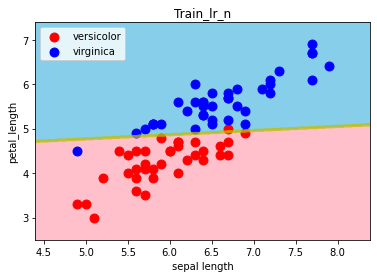

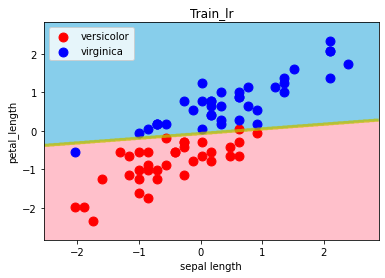

In [48]:
train_lr_n = decision_region(X_train, y_train, lr_n, title='Train_lr_n', xlabel='sepal length', ylabel='petal_length')
train_lr = decision_region(X_train_std, y_train, lr, title='Train_lr', xlabel='sepal length', ylabel='petal_length')

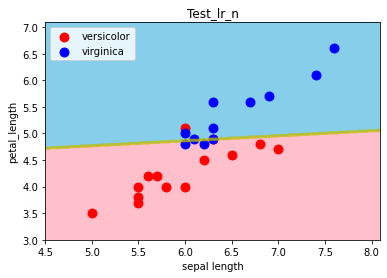

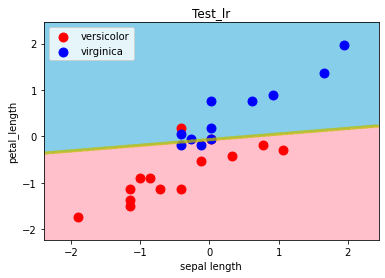

In [49]:
test_lr_n = decision_region(X_test, y_test, lr_n, title='Test_lr_n', xlabel='sepal length', ylabel='petal_length')
test_lr = decision_region(X_test_std, y_test, lr, title='Test_lr', xlabel='sepal length', ylabel='petal_length')

In [50]:
pred_df_n = pred_df_n.assign(Logistic = [metrics.accuracy_score(y_pred_lr_n, y_test), 
                                                   metrics.precision_score(y_pred_lr_n, y_test), 
                                                   metrics.recall_score(y_pred_lr_n, y_test), 
                                                   metrics.f1_score(y_pred_lr_n, y_test), 
                                                   metrics.confusion_matrix(y_pred_lr_n, y_test)])

#### 3. SVM

In [51]:
from sklearn.svm import SVC
svc_n = SVC()
svc_n.fit(X_train, y_train)
y_pred_svc_n = svc_n.predict(X_test)
y_pred_svc_n

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

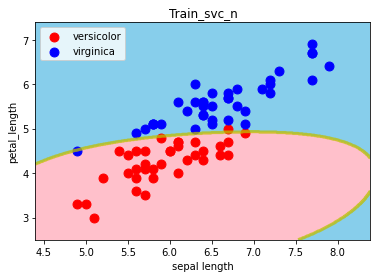

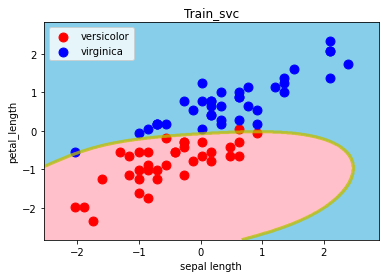

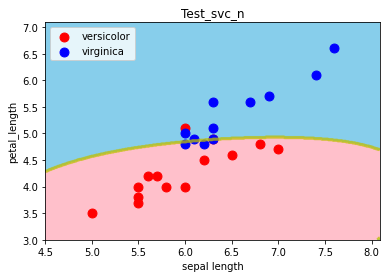

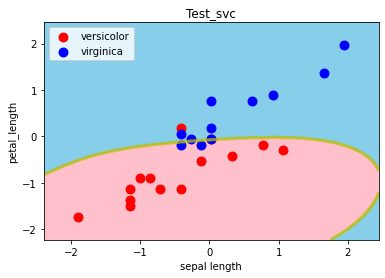

In [52]:
train_svc_n = decision_region(X_train, y_train, svc_n, title='Train_svc_n', xlabel='sepal length', ylabel='petal_length')
train_svc = decision_region(X_train_std, y_train, svc, title='Train_svc', xlabel='sepal length', ylabel='petal_length')
test_svc_n = decision_region(X_test, y_test, svc_n, title='Test_svc_n', xlabel='sepal length', ylabel='petal_length')
test_svc = decision_region(X_test_std, y_test, svc, title='Test_svc', xlabel='sepal length', ylabel='petal_length')

In [53]:
pred_df_n = pred_df_n.assign(SVM = [metrics.accuracy_score(y_pred_svc_n, y_test), 
                                                   metrics.precision_score(y_pred_svc_n, y_test), 
                                                   metrics.recall_score(y_pred_svc_n, y_test), 
                                                   metrics.f1_score(y_pred_svc_n, y_test), 
                                                   metrics.confusion_matrix(y_pred_svc_n, y_test)])

#### 4. 決定木

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree_n = DecisionTreeClassifier()
tree_n.fit(X_train, y_train)
y_pred_tree_n = tree_n.predict(X_test)
y_pred_tree_n

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

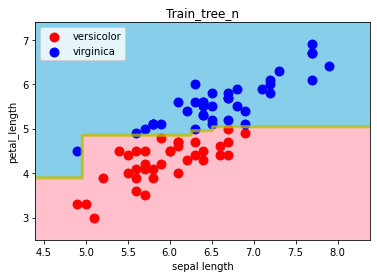

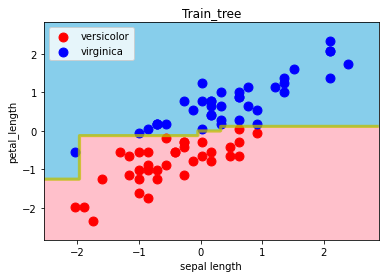

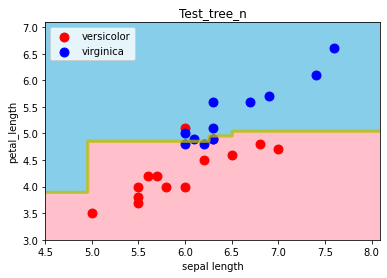

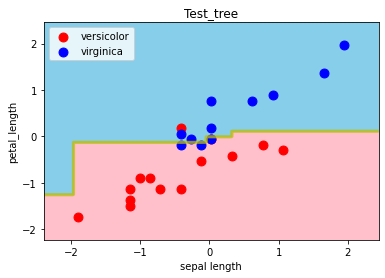

In [55]:
train_tree_n = decision_region(X_train, y_train, tree_n, title='Train_tree_n', xlabel='sepal length', ylabel='petal_length')
train_tree = decision_region(X_train_std, y_train, tree, title='Train_tree', xlabel='sepal length', ylabel='petal_length')

test_tree_n = decision_region(X_test, y_test, tree_n, title='Test_tree_n', xlabel='sepal length', ylabel='petal_length')
test_tree = decision_region(X_test_std, y_test, tree, title='Test_tree', xlabel='sepal length', ylabel='petal_length')

In [56]:
pred_df_n = pred_df_n.assign(Decision_Tree = [metrics.accuracy_score(y_pred_tree_n, y_test), 
                                                   metrics.precision_score(y_pred_tree_n, y_test), 
                                                   metrics.recall_score(y_pred_tree_n, y_test), 
                                                   metrics.f1_score(y_pred_tree_n, y_test), 
                                                   metrics.confusion_matrix(y_pred_tree_n, y_test)])

#### 5. ランダムフォレスト

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc_n = RandomForestClassifier()
rfc_n.fit(X_train, y_train)
y_pred_rfc_n = rfc_n.predict(X_test)
y_pred_rfc_n

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2])

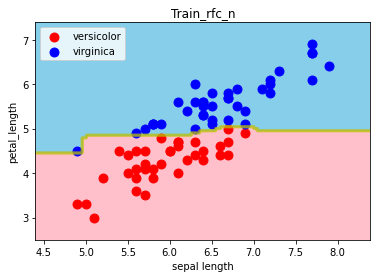

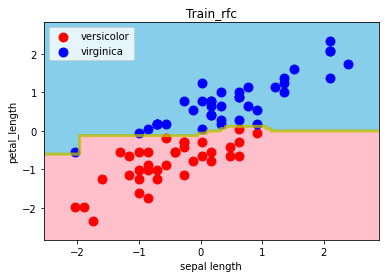

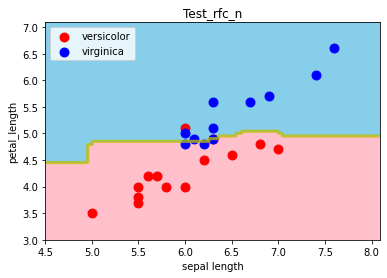

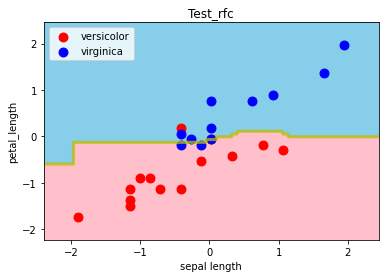

In [58]:
train_rfc_n = decision_region(X_train, y_train, rfc_n, title='Train_rfc_n', xlabel='sepal length', ylabel='petal_length')
train_rfc = decision_region(X_train_std, y_train, rfc, title='Train_rfc', xlabel='sepal length', ylabel='petal_length')

test_rfc_n = decision_region(X_test, y_test, rfc_n, title='Test_rfc_n', xlabel='sepal length', ylabel='petal_length')
test_rfc = decision_region(X_test_std, y_test, rfc, title='Test_rfc', xlabel='sepal length', ylabel='petal_length')

In [59]:
pred_df_n = pred_df_n.assign(Random_Forest = [metrics.accuracy_score(y_pred_rfc_n, y_test), 
                                                   metrics.precision_score(y_pred_rfc_n, y_test), 
                                                   metrics.recall_score(y_pred_rfc_n, y_test), 
                                                   metrics.f1_score(y_pred_rfc_n, y_test), 
                                                   metrics.confusion_matrix(y_pred_rfc_n, y_test)])

In [60]:
pred_df# 標準化あり

,k-nearest neighbors_5nn,k-nearest neighbors_3nn,k-nearest neighbors_1nn,Logistic,SVM,Decision_Tree,Random_Forest
accuracy,0.8,0.8,0.8,0.84,0.84,0.84,0.84
precision,0.928571,0.857143,0.857143,0.857143,0.857143,0.928571,0.928571
recall,0.764706,0.8,0.8,0.857143,0.857143,0.8125,0.8125
f1,0.83871,0.827586,0.827586,0.857143,0.857143,0.866667,0.866667
confusion_matrix,"[[13, 4], [1, 7]]","[[12, 3], [2, 8]]","[[12, 3], [2, 8]]","[[12, 2], [2, 9]]","[[12, 2], [2, 9]]","[[13, 3], [1, 8]]","[[13, 3], [1, 8]]"


In [61]:
pred_df_n# 標準化なし

,k-nearest neighbors_5nn_n,k-nearest neighbors_3nn_n,k-nearest neighbors_1nn_n,Logistic,SVM,Decision_Tree,Random_Forest
accuracy,0.8,0.8,0.8,0.84,0.84,0.84,0.84
precision,0.928571,0.857143,0.857143,0.857143,0.857143,0.928571,0.928571
recall,0.764706,0.8,0.8,0.857143,0.857143,0.8125,0.8125
f1,0.83871,0.827586,0.827586,0.857143,0.857143,0.866667,0.866667
confusion_matrix,"[[13, 4], [1, 7]]","[[12, 3], [2, 8]]","[[12, 3], [2, 8]]","[[12, 2], [2, 9]]","[[12, 2], [2, 9]]","[[13, 3], [1, 8]]","[[13, 3], [1, 8]]"


**→結果として、ランダムフォレストだけが標準化で精度が少し向上したが、**

**他の方法では標準化による精度の向上は見られなかった。**

### 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

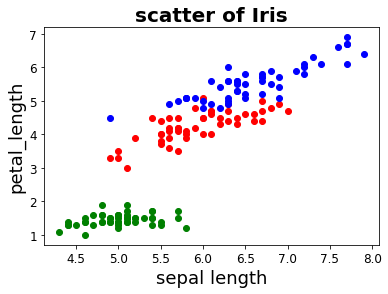

In [62]:
x_0 = df.query("Species == 0").iloc[:, 0:1]# sepal lengthでラベル０
x_1 = df.query("Species == 1").iloc[:, 0:1]# sepal lengthでラベル1
x_2 = df.query("Species == 2").iloc[:, 0:1]# sepal lengthでラベル2

y_0 = df.query("Species == 0").iloc[:, 2:3]# petal_lengthでラベル０
y_1 = df.query("Species == 1").iloc[:, 2:3]# petal_lengthでラベル1
y_2 = df.query("Species == 2").iloc[:, 2:3]# petal_lengthでラベル2

# 散布図を描画
plt.title("scatter of Iris", size=20, weight='heavy')
plt.xlabel("sepal length", size=18)
plt.ylabel("petal_length", size=18)
plt.tick_params(labelsize=12)
plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red')
plt.scatter(x_2, y_2, c='blue')

In [63]:
df2 = df.loc[:, ["sepal_length", "petal_length", "Species"]]
df2.shape

(150, 3)

In [64]:
X = df2.iloc[:, :2].values# ndarrayに変換
y = (df2.iloc[:, 2:].values).reshape(-1)# ndarrayに変換して一次元配列に
#print(X)
#print(y)
print("X:", X.shape)
print("y:", y.shape)

X: (150, 2)
y: (150,)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X", type(X))
print("y", type(y))
print("X_train : ", X_train.shape, "X_test : ", X_test.shape)
print("y_train : ", y_train.shape, "y_test : ", y_test.shape)

X <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
X_train :  (112, 2) X_test :  (38, 2)
y_train :  (112,) y_test :  (38,)


In [66]:
# 標準化
scaler = StandardScaler()# インスタンスの生成
scaler.fit(X_train)# Xの訓練データのみ標準化
X_train_std_1 = scaler.transform(X_train)#fitの計算結果を訓練データに適用
X_test_std_1 = scaler.transform(X_test)# fiの計算結果をテストデータに適用

print("X_train_std_1", X_train_std_1.shape)
print("X_test_std_1", X_test_std_1.shape)
print("X_train_std_1.mean", X_train_std_1.mean(axis=0))# 平均
print("X_train_std_1.std", X_train_std_1.std(axis=0))# 分散

X_train_std_1 (112, 2)
X_test_std_1 (38, 2)
X_train_std_1.mean [ 1.72282823e-15 -4.24263799e-16]
X_train_std_1.std [1. 1.]


#### 1. 最近傍法

In [67]:
# インスタンス生成
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_1 = KNeighborsClassifier(n_neighbors=1)

# 訓練データで学習
knn_5.fit(X_train_std_1, y_train)
knn_3.fit(X_train_std_1, y_train)
knn_1.fit(X_train_std_1, y_train)

# テストデータで予測
y_pred_5nn= knn_5.predict(X_test_std_1)
y_pred_3nn= knn_3.predict(X_test_std_1)
y_pred_1nn= knn_1.predict(X_test_std_1)

print("5-nn", y_pred_5nn)
print("3-nn", y_pred_3nn)
print("1-nn", y_pred_1nn)

5-nn [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
3-nn [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
1-nn [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 1 2 2 0 0 0 0 1 0 0 2 1
 0]


In [68]:
def evaluation(y_pred, y_test):
    acc = metrics.accuracy_score(y_pred, y_test)
    precision = metrics.precision_score(y_pred, y_test)
    recall = metrics.recall_score(y_pred, y_test)
    f1 = metrics.f1_score(y_pred, y_test)
    confusion = metrics.confusion_matrix(y_pred, y_test)
    print("acc:", acc)
    print("precision:", precision)
    print("recall:", recall)
    print("f1:", f1)
    print("confusion:\n", confusion)
    print("------------")
    return acc, precision, recall, f1, confusion

print("5-nn;")
evl_5nn = evaluation(y_pred_5nn, y_test)

print("3-nn;")
evl_3nn = evaluation(y_pred_3nn, y_test)

print("1-nn;")
evl_1nn = evaluation(y_pred_1nn, y_test)


5-nn;


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

**【エラー内容】：**

Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

多値分類を行う場合はPrecision（適合率）、Recall（再現率）、F値には

- 1. micro:ミクロ(マイクロ)平均
- 2. macro:マクロ平均
- 3. weighted:重みつき平均

のいずれかを指定してあげる必要がある。

参考URL：

[各平均について](https://www.haya-programming.com/entry/2018/03/14/112454)

**→今回はクラス（花の名前）ごとで、データ件数にバラツキが無い為、マクロ平均を用いる。**

In [69]:
def evaluation_3dim(y_pred, y_test, average='macro'):
    acc = metrics.accuracy_score(y_pred, y_test)
    precision = metrics.precision_score(y_pred, y_test, average=average)#マクロ平均
    recall = metrics.recall_score(y_pred, y_test, average=average)#マクロ平均
    f1 = metrics.f1_score(y_pred, y_test, average=average)#マクロ平均
    confusion = metrics.confusion_matrix(y_pred, y_test)
    print("acc:", acc)
    print("precision:", precision)
    print("recall:", recall)
    print("f1:", f1)
    print("confusion:\n", confusion)
    print("------------")
    return acc, precision, recall, f1, confusion

print("5-nn;")
evl_5nn = evaluation_3dim(y_pred_5nn, y_test)

print("3-nn;")
evl_3nn = evaluation_3dim(y_pred_3nn, y_test)

print("1-nn;")
evl_1nn = evaluation_3dim(y_pred_1nn, y_test)

5-nn;
acc: 0.9473684210526315
precision: 0.9419191919191919
recall: 0.9419191919191919
f1: 0.9419191919191919
confusion:
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
------------
3-nn;
acc: 0.9473684210526315
precision: 0.9419191919191919
recall: 0.9419191919191919
f1: 0.9419191919191919
confusion:
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
------------
1-nn;
acc: 0.8947368421052632
precision: 0.8863636363636364
recall: 0.8897435897435897
f1: 0.8838383838383838
confusion:
 [[15  0  0]
 [ 0 10  3]
 [ 0  1  9]]
------------


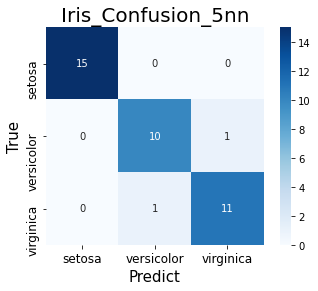

In [70]:
# 混同行列
cm = metrics.confusion_matrix(y_test,  y_pred_5nn)
cm = pd.DataFrame(data=cm, index=["setosa", "versicolor", "virginica"], 
                           columns=["setosa", "versicolor", "virginica"])
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.title("Iris_Confusion_5nn", size=20)
plt.tick_params(labelsize=12)
plt.xlabel("Predict", fontsize=15, rotation=0)
plt.ylabel("True", fontsize=15)
plt.savefig('sklearn_confusion_matrix.png')

In [71]:
def decision_region_3dim(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    3値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 3)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['greenyellow', 'pink', 'skyblue']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

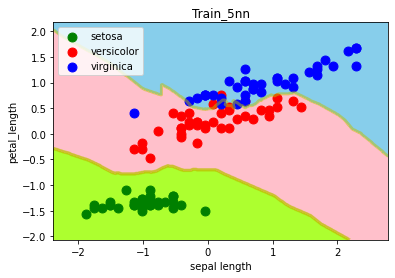

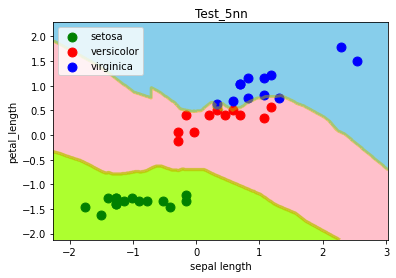

In [72]:
#可視化
train_5nn = decision_region_3dim(X_train_std_1, y_train, knn_5, title='Train_5nn', xlabel='sepal length', ylabel='petal_length')
test_5nn = decision_region_3dim(X_test_std_1, y_test, knn_5, title='Test_5nn', xlabel='sepal length', ylabel='petal_length')

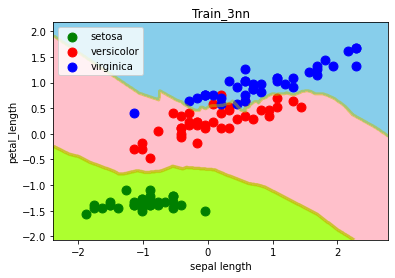

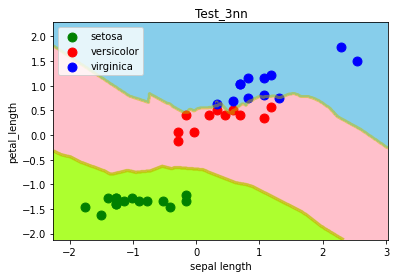

In [73]:
#可視化
train_3nn = decision_region_3dim(X_train_std_1, y_train, knn_3, title='Train_3nn', xlabel='sepal length', ylabel='petal_length')
test_3nn = decision_region_3dim(X_test_std_1, y_test, knn_3, title='Test_3nn', xlabel='sepal length', ylabel='petal_length')

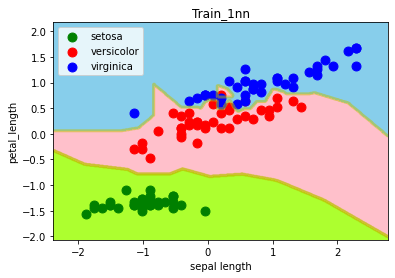

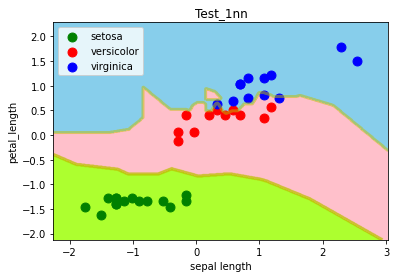

In [74]:
#可視化
train_1nn = decision_region_3dim(X_train_std_1, y_train, knn_1, title='Train_1nn', xlabel='sepal length', ylabel='petal_length')
test_1nn = decision_region_3dim(X_test_std_1, y_test, knn_1, title='Test_1nn', xlabel='sepal length', ylabel='petal_length')

In [75]:
# 表作成用
pred_df1 = pd.DataFrame({'k-nearest neighbors_5nn' : [metrics.accuracy_score(y_pred_5nn, y_test), 
                                                   metrics.precision_score(y_pred_5nn, y_test, average='macro'), 
                                                   metrics.recall_score(y_pred_5nn, y_test, average='macro'), 
                                                   metrics.f1_score(y_pred_5nn, y_test, average='macro'), 
                                                   metrics.confusion_matrix(y_pred_5nn, y_test)], 
                                                  'k-nearest neighbors_3nn' : [metrics.accuracy_score(y_pred_3nn, y_test), 
                                                    metrics.precision_score(y_pred_3nn, y_test, average='macro'), 
                                                    metrics.recall_score(y_pred_3nn, y_test, average='macro'), 
                                                    metrics.f1_score(y_pred_3nn, y_test, average='macro'), 
                                                    metrics.confusion_matrix(y_pred_3nn, y_test)], 
                                                  'k-nearest neighbors_1nn' : [metrics.accuracy_score(y_pred_1nn, y_test), 
                                                    metrics.precision_score(y_pred_1nn, y_test, average='macro'), 
                                                    metrics.recall_score(y_pred_1nn, y_test, average='macro'), 
                                                    metrics.f1_score(y_pred_1nn, y_test, average='macro'), 
                                                    metrics.confusion_matrix(y_pred_1nn, y_test)]}, 
                                               index=["accuracy", "precision", "recall", "f1", "confusion_matrix"])

#### 2. ロジスティック回帰

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std_1, y_train)
y_pred_lr = lr.predict(X_test_std_1)
y_pred_lr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [78]:
print("Logistic;")
evl_lr= evaluation_3dim(y_pred_lr, y_test)

Logistic;
acc: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
confusion:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
------------


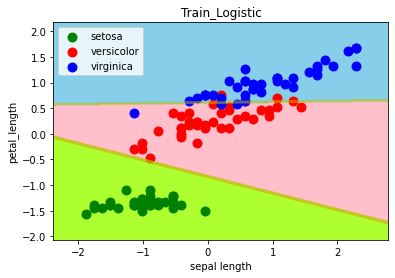

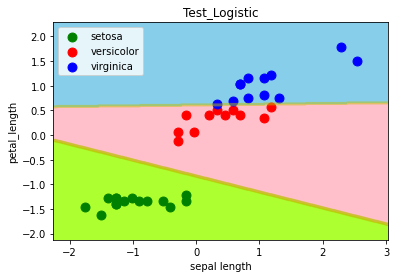

In [79]:
train_lr_1 = decision_region_3dim(X_train_std_1, y_train, lr, title='Train_Logistic', xlabel='sepal length', ylabel='petal_length')
test_lr_1 = decision_region_3dim(X_test_std_1, y_test, lr, title='Test_Logistic', xlabel='sepal length', ylabel='petal_length')

In [80]:
# 表作成用
pred_df1 = pred_df1.assign(Logistic = [metrics.accuracy_score(y_pred_lr, y_test), 
                                                   metrics.precision_score(y_pred_lr, y_test, average='macro'), 
                                                   metrics.recall_score(y_pred_lr, y_test, average='macro'), 
                                                   metrics.f1_score(y_pred_lr, y_test, average='macro'), 
                                                   metrics.confusion_matrix(y_pred_lr, y_test)])

#### 3. SVC

In [81]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_std_1, y_train)
y_pred_svc = svc.predict(X_test_std_1)
y_pred_svc

print("SVM;")
evl_svc= evaluation_3dim(y_pred_svc, y_test)

SVM;
acc: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
confusion:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
------------


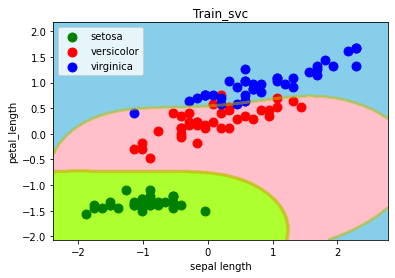

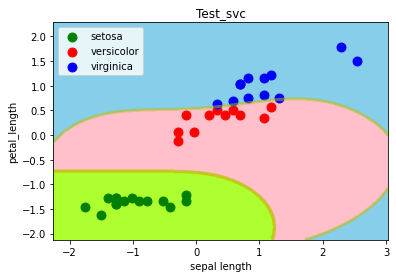

In [82]:
train_svc_1 = decision_region_3dim(X_train_std_1, y_train, svc, title='Train_svc', xlabel='sepal length', ylabel='petal_length')
test_svc_1 = decision_region_3dim(X_test_std_1, y_test, svc, title='Test_svc', xlabel='sepal length', ylabel='petal_length')

In [83]:
# 表作成用
pred_df1 = pred_df1.assign(SVM = [metrics.accuracy_score(y_pred_svc, y_test), 
                                                   metrics.precision_score(y_pred_svc, y_test, average='macro'), 
                                                   metrics.recall_score(y_pred_svc, y_test, average='macro'), 
                                                   metrics.f1_score(y_pred_svc, y_test, average='macro'), 
                                                   metrics.confusion_matrix(y_pred_svc, y_test)])

#### 4.決定木

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_std_1, y_train)
y_pred_tree = tree.predict(X_test_std_1)
y_pred_tree

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [85]:
print("Decision Tree;")
evl_tree = evaluation_3dim(y_pred_tree, y_test)

Decision Tree;
acc: 0.9736842105263158
precision: 0.9722222222222222
recall: 0.9722222222222222
f1: 0.9710144927536232
confusion:
 [[15  0  0]
 [ 0 11  1]
 [ 0  0 11]]
------------


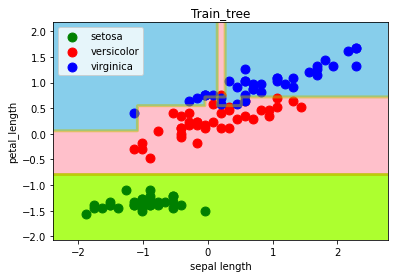

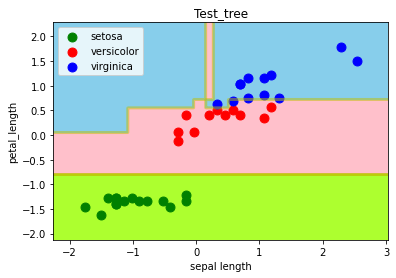

In [86]:
train_tree = decision_region_3dim(X_train_std_1, y_train, tree, title='Train_tree', xlabel='sepal length', ylabel='petal_length')
test_tree = decision_region_3dim(X_test_std_1, y_test, tree, title='Test_tree', xlabel='sepal length', ylabel='petal_length')

In [87]:
pred_df1 = pred_df1.assign(Decision_Tree = [metrics.accuracy_score(y_pred_tree, y_test), 
                                                   metrics.precision_score(y_pred_tree, y_test, average='macro'), 
                                                   metrics.recall_score(y_pred_tree, y_test, average='macro'), 
                                                   metrics.f1_score(y_pred_tree, y_test, average='macro'), 
                                                   metrics.confusion_matrix(y_pred_tree, y_test)])

#### 5. ランダムフォレスト

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_std_1, y_train)
y_pred_rfc = rfc.predict(X_test_std_1)
y_pred_rfc

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [89]:
print("Random Forest;")
evl_rfc= evaluation_3dim(y_pred_rfc, y_test)

Random Forest;
acc: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
confusion:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
------------


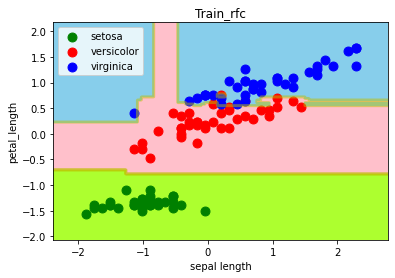

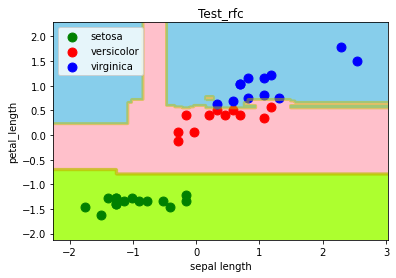

In [90]:
train_rfc = decision_region_3dim(X_train_std_1, y_train, rfc, title='Train_rfc', xlabel='sepal length', ylabel='petal_length')
test_rfc = decision_region_3dim(X_test_std_1, y_test, rfc, title='Test_rfc', xlabel='sepal length', ylabel='petal_length')

In [91]:
pred_df1 = pred_df1.assign(Random_Forest = [metrics.accuracy_score(y_pred_rfc, y_test), 
                                                   metrics.precision_score(y_pred_rfc, y_test, average='macro'), 
                                                   metrics.recall_score(y_pred_rfc, y_test, average='macro'), 
                                                   metrics.f1_score(y_pred_rfc, y_test, average='macro'), 
                                                   metrics.confusion_matrix(y_pred_rfc, y_test)])

In [92]:
pred_df1

,k-nearest neighbors_5nn,k-nearest neighbors_3nn,k-nearest neighbors_1nn,Logistic,SVM,Decision_Tree,Random_Forest
accuracy,0.947368,0.947368,0.894737,1,1,0.973684,1
precision,0.941919,0.941919,0.886364,1,1,0.972222,1
recall,0.941919,0.941919,0.889744,1,1,0.972222,1
f1,0.941919,0.941919,0.883838,1,1,0.971014,1
confusion_matrix,"[[15, 0, 0], [0, 10, 1], [0, 1, 11]]","[[15, 0, 0], [0, 10, 1], [0, 1, 11]]","[[15, 0, 0], [0, 10, 3], [0, 1, 9]]","[[15, 0, 0], [0, 11, 0], [0, 0, 12]]","[[15, 0, 0], [0, 11, 0], [0, 0, 12]]","[[15, 0, 0], [0, 11, 1], [0, 0, 11]]","[[15, 0, 0], [0, 11, 0], [0, 0, 12]]"


**→最も精度の高い手法は「ロジスティック回帰」、「SVM」、「ランダムフォレスト」だった。**